In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming


In [9]:
def draw_matches(matches, keypoints1, descriptors1, keypoints2, descriptors2, image1, image2):
    output = cv.drawMatches(img1=image1,keypoints1=keypoints1, img2=image2,keypoints2=keypoints2, matches1to2=matches[:15], outImg=None,
                            flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(output)
    plt.show()


In [10]:
def brisk_descriptor(img1, img2):
    image1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    image2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)  

    BRISK = cv.BRISK_create()
    keypoints1, descriptors1 = BRISK.detectAndCompute(image1, None)
    keypoints2, descriptors2 = BRISK.detectAndCompute(image2, None)

    print('Number of keypoints Detected on distorted image:', len(keypoints2), "\n")
    return keypoints1, descriptors1, keypoints2, descriptors2


In [11]:
def brute_force_matcher(keypoints1, descriptors1, keypoints2, descriptors2):
    BFMatcher = cv.BFMatcher(normType=cv.NORM_HAMMING, crossCheck=True)
    matches = BFMatcher.match(queryDescriptors=descriptors1, trainDescriptors=descriptors2)
    
    matches = sorted(matches, key=lambda x: x.distance)
    return matches


In [12]:
def own_matcher(keypoints1, descriptors1, keypoints2, descriptors2):
    matches = []
    for i, k1 in enumerate(descriptors1):
        for j, k2 in enumerate(descriptors2):
            matches.append(cv.DMatch(_distance=hamming(k1, k2) * len(k1), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance)
    return matches


In [13]:
original_image = cv.cvtColor(cv.imread('original_image.jpg'), cv.COLOR_BGR2RGB)
distorted_image = cv.cvtColor(cv.imread('distorted_image.jpg'), cv.COLOR_BGR2RGB)
keypoints1, descriptors1, keypoints2, descriptors2 = brisk_descriptor(original_image, distorted_image)


Number of keypoints Detected on distorted image: 434 



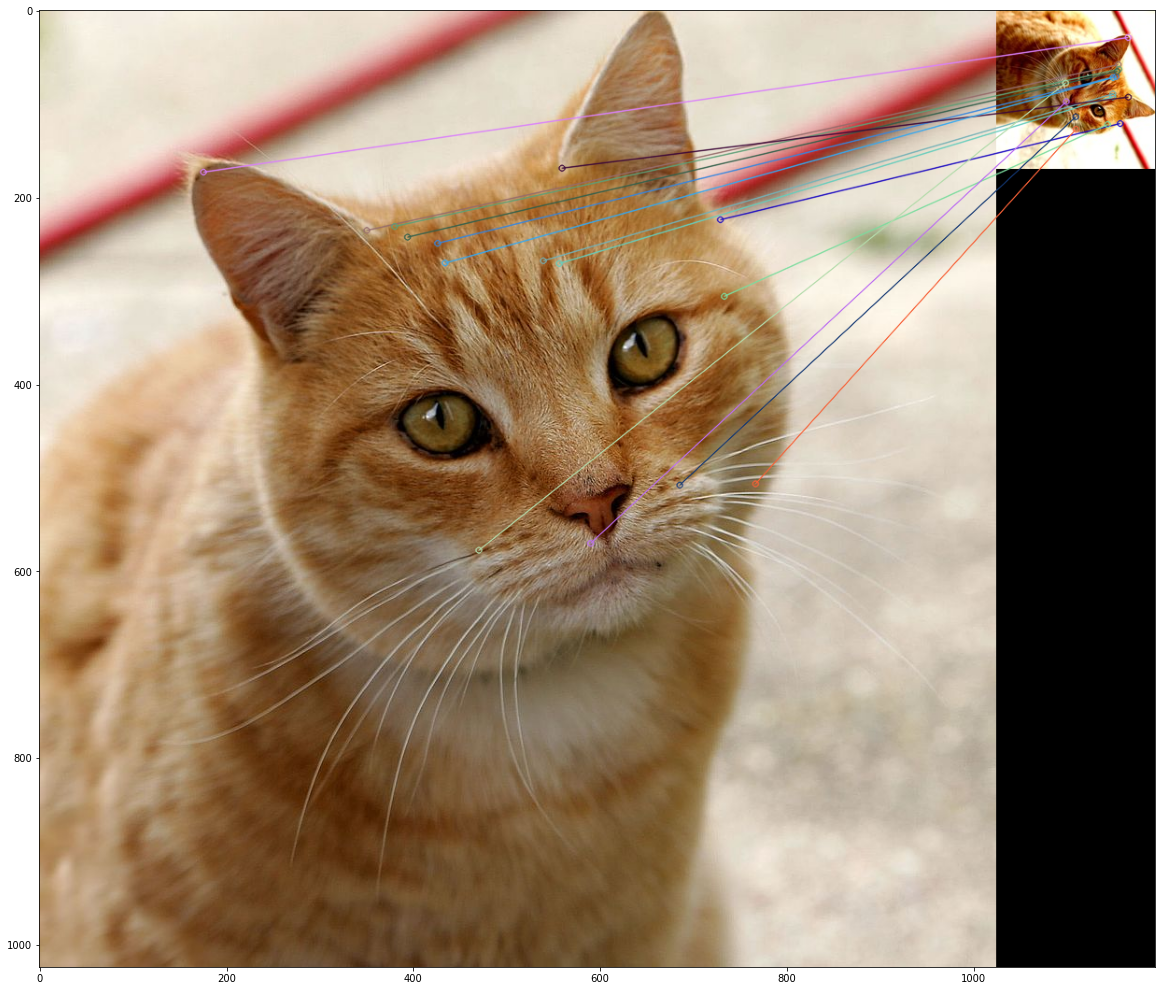

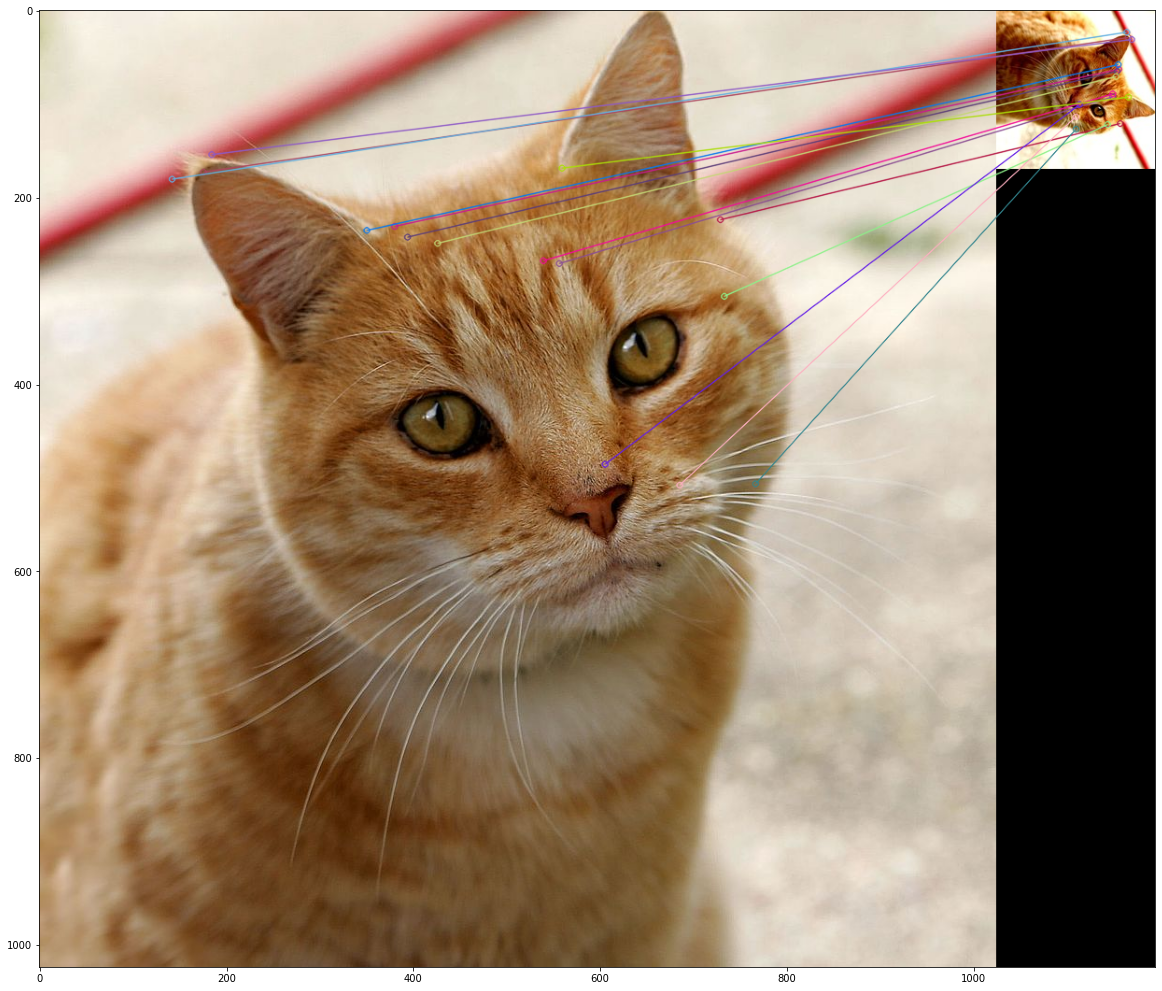

In [14]:
matches1 = brute_force_matcher(keypoints1, descriptors1, keypoints2, descriptors2)
draw_matches(matches1, keypoints1, descriptors1, keypoints2, descriptors2, original_image, distorted_image)
matches2 = own_matcher(keypoints1, descriptors1, keypoints2, descriptors2)
draw_matches(matches2, keypoints1, descriptors1, keypoints2, descriptors2, original_image, distorted_image)
original_image = cv.cvtColor(cv.imread('original_image.jpg'), cv.COLOR_BGR2RGB)
distorted_image = cv.cvtColor(cv.imread('distorted_image.jpg'), cv.COLOR_BGR2RGB)
